In [34]:
%load_ext autoreload
%autoreload 2
import html_parser
from ner import EntityExtractor
import psycopg2
import pandas as pd
import glob
from tqdm import tqdm
from names_parser import NameParser
import db

tqdm.pandas()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
docs, cols = fetch_228(limit=1000000)
print("Total docs: ", len(docs))

Total docs:  340198


In [32]:
df = pd.DataFrame(docs, columns=cols)
df["case_year_result"] = df["case_year_result"].apply(lambda x: str(int(x)))
df.drop(
    labels=df[~df["case_common_document_type"].isin(
        ['Приговор', 'Приговоры', 'Постановление', 'Постановления']
        )].index,
    inplace=True
    )
print(len(df))

339023


In [35]:
df['text_count'] = df['encode'].progress_apply(db.text_exists)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 339023/339023 [00:49<00:00, 6819.04it/s]


In [22]:
uid = '7ce60d022f887529bb4280215147907d'
text = load_text(uid)
text[:100]

'№ 1-147/2017\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\nг. Екатеринбург \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0'

In [23]:
sents[0]

'№ 1-147/2017\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\nг. Екатеринбург \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa019 марта 2018 года\nОрджоникидзевский районный суд г. Екатеринбурга в составе:председательствующего судьи Галимовой Н.Р., \nс участием государственного обвинителя - помощника прокурора Орджоникидзевского района г. Екатеринбурга Власовой К.В.,\nподсудимого Вершинина А.Е.,\nзащитника в лице адвоката Солдаткина В.А.,\nпри секретаре Бусыгиной А.А.,\nрассмотрев в открытом судебном заседании материалы уголовного дела в отношении:\nВершинина А. Е., < данные изъяты >, ранее судимого:\n-13.12.2016 года приговором Нижнесергинского районного суда Свердловской

In [24]:
from razdel import sentenize

def split_sents(text):
    subs = list(sentenize(text))
    sents = [sub.text for sub in subs]
    return sents

sents = split_sents(text)
split_sents(sents[0])

['№ 1-147/2017\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\nг. Екатеринбург \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa019 марта 2018 года\nОрджоникидзевский районный суд г. Екатеринбурга в составе:председательствующего судьи Галимовой Н.Р., \nс участием государственного обвинителя - помощника прокурора Орджоникидзевского района г. Екатеринбурга Власовой К.В.,\nподсудимого Вершинина А.Е.,\nзащитника в лице адвоката Солдаткина В.А.,\nпри секретаре Бусыгиной А.А.,\nрассмотрев в открытом судебном заседании материалы уголовного дела в отношении:\nВершинина А. Е., < данные изъяты >, ранее судимого:\n-13.12.2016 года приговором Нижнесергинского районного суда Свердловско

In [ ]:
doc.segment(segmenter)

In [25]:
sents[0]

'№ 1-147/2017\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\nг. Екатеринбург \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa019 марта 2018 года\nОрджоникидзевский районный суд г. Екатеринбурга в составе:председательствующего судьи Галимовой Н.Р., \nс участием государственного обвинителя - помощника прокурора Орджоникидзевского района г. Екатеринбурга Власовой К.В.,\nподсудимого Вершинина А.Е.,\nзащитника в лице адвоката Солдаткина В.А.,\nпри секретаре Бусыгиной А.А.,\nрассмотрев в открытом судебном заседании материалы уголовного дела в отношении:\nВершинина А. Е., < данные изъяты >, ранее судимого:\n-13.12.2016 года приговором Нижнесергинского районного суда Свердловской

In [20]:
subs[0].text

'№ 1-147/2017\nПРИГОВОР\nИМЕНЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ\nг. Екатеринбург \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa019 марта 2018 года\nОрджоникидзевский районный суд г. Екатеринбурга в составе:председательствующего судьи Галимовой Н.Р., \nс участием государственного обвинителя - помощника прокурора Орджоникидзевского района г. Екатеринбурга Власовой К.В.,\nподсудимого Вершинина А.Е.,\nзащитника в лице адвоката Солдаткина В.А.,\nпри секретаре Бусыгиной А.А.,\nрассмотрев в открытом судебном заседании материалы уголовного дела в отношении:\nВершинина А. Е., < данные изъяты >, ранее судимого:\n-13.12.2016 года приговором Нижнесергинского районного суда Свердловской

In [15]:
import razdel

In [47]:
import time

def extract_text_and_attrs(uids):
    summaries = []
    texts = [load_text(uid) for uid in uids if load_text(uid) is not None]
    print(len(texts))
    start = time.time()
    for t in texts:
        sd = EntityExtractor(t).summary_dict
        sd['sex'] = NameParser(t).sex
        # sd["text"] = parsed_text
        summaries.append(sd)
        
    end = time.time()
    return summaries, end-start

2022-02-11 20:21:16,010 INFO __init__ Loading dictionaries from /home/tonko22/228/env/lib/python3.8/site-packages/pymorphy2_dicts/data
2022-02-11 20:21:16,058 INFO __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [96]:
pt_size = 100000
df_text_pt = df[df['text_count']==1].head(pt_size)
len(df_text_pt)
# df_pt["names_natasha"] = df_pt['u_common_case_defendant_m'].progress_apply(extract_name_from_db_field)

100000

In [52]:
sums = extract_text_and_attrs(df_text_pt["encode"])

1000


2022-02-11 20:22:20,685 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:20,701 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:20,787 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:20,802 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:20,819 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:20,832 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:20,966 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:20,980 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:22,245 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:22,260 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:22,360 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:22:22,389 WARNING drugs No drugs found i

Could noto conver drug mass to float: .


2022-02-11 20:23:08,209 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,232 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,257 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,278 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,311 ERROR court_name Could not extract court_name
2022-02-11 20:23:08,541 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,562 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,584 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,605 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,647 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,653 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:08,697 WARNING drugs No drugs found in whole text, ch

Could noto conver drug mass to float: .


2022-02-11 20:23:12,350 WARNING drugs No drugs found in whole text, check matches: [('мм.гггг, милько д.в., имея преступный умысел, направленный на незаконные приобретение и хранение без цели сбыта наркотических средств в крупном размере, в нарушение федерального закона «о наркотических средствах и психотропных веществах» от 08.01.1998 года № з-фз, постановления правительства рф «об утверждении перечня наркотических средств, психотропных веществ и их прекурсоров, подлежащих контролю в российской федерации» от 30.06.1998 г. № 681, находясь рядом с домом № по <адрес>, у неустановленного в ходе следствия лица, незаконно приобрел без цели сбыта наркотическое средство «n-( 1 -карбамоил-2-метилпропил)-1 - (циклогексилметил)-1 н-индазол-3-карбоксамид (другое название: ab-pinaca-chm)» - производное наркотического средства «n(1-карбамоил-2-метилпропил)-1-пентил-1 н-индазол-3- карбоксамида (другое название: ab-pinaca)», массой ', '0,91', 'гр.', ', что согласно постановления правительства рф № 10

Could noto conver drug mass to float: .


2022-02-11 20:23:49,219 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:49,503 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:49,603 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:50,033 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:50,139 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:50,311 WARNING drugs No drugs found in whole text, check matches: [('и., с целью оказания помощи крюкову с.а. в незаконном приобретении наркотического средства без цели сбыта в значительном размере, по просьбе фио8 после встречи с последним дд.мм.гггг возле дома <адрес> при неустановленных следствием обстоятельствах, незаконно приобрёл у неустановленного следствием лица, уголовное дело в отношении которого выделено в отдельное производство, наркотическое средство – ..., массой ', '6,72', 'гр.', ', что согласно постановлению правительства рф от 01 

Could noto conver drug mass to float: .


2022-02-11 20:23:53,675 ERROR court_name Could not extract court_name
2022-02-11 20:23:53,764 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:53,850 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,105 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,192 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,217 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,240 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,304 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,332 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,337 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,341 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:23:54,385 WARNING drugs No drugs found in whole text, ch

Could noto conver drug mass to float: .


2022-02-11 20:24:01,597 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:01,644 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:01,659 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:01,729 ERROR court_name Could not extract court_name
2022-02-11 20:24:02,438 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:02,457 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:02,477 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:02,497 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:02,541 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:02,584 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:02,711 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:02,754 WARNING drugs No drugs found in whole text, ch

Could noto conver drug mass to float: .
Could noto conver drug mass to float: .


2022-02-11 20:24:04,633 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,641 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,650 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,658 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,677 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,695 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,713 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,731 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,739 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,744 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,780 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:04,786 WARNING drugs No drugs found i

Could noto conver drug mass to float: .


2022-02-11 20:24:15,264 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,477 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,703 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,903 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,917 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,928 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,940 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,951 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:15,977 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:16,001 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:16,024 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:16,047 WARNING drugs No drugs found i

Could noto conver drug mass to float: .


2022-02-11 20:24:36,010 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:36,022 ERROR court_name Could not extract court_name
2022-02-11 20:24:36,439 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:36,748 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:37,070 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:37,385 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:37,408 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:37,427 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:37,482 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:37,501 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:37,613 WARNING drugs No drugs found in whole text, check matches: [('в. 15.06.2015 г. около 19:00 часов, действуя умышленно, находясь возле

Could noto conver drug mass to float: .


2022-02-11 20:24:41,685 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,697 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,837 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,848 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,899 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,924 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,948 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,970 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,976 ERROR court_name Could not extract court_name
2022-02-11 20:24:41,979 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,983 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:41,986 WARNING drugs No drugs found in whole text, ch

Could noto conver drug mass to float: .


2022-02-11 20:24:42,825 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:42,831 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:42,836 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:42,841 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:42,876 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:42,908 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:43,006 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:43,038 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:43,052 ERROR court_name Could not extract court_name
2022-02-11 20:24:43,077 WARNING drugs No drugs found in whole text, check matches: [(' ###, согласно которому n-(1-карбамоил-2-метилпропил)-1-пентил-1н-индазол-3-карбоксамид и его производные, массой свыше ', '0,25', 'гр.', ' относится к круп

Could noto conver drug mass to float: .


2022-02-11 20:24:48,272 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,293 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,316 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,337 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,361 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,383 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,447 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,469 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,482 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,493 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,506 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:24:48,516 WARNING drugs No drugs found i

Could noto conver drug mass to float: .


2022-02-11 20:25:07,402 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:07,467 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:07,533 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:07,615 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:07,620 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:07,625 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:07,630 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:07,635 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:08,047 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:08,060 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:08,073 WARNING drugs No drugs found in whole text, check matches: []
2022-02-11 20:25:08,086 WARNING drugs No drugs found i

Could noto conver drug mass to float: .


2022-02-11 20:25:08,444 WARNING drugs No drugs found in whole text, check matches: [('мм.гггг в *** часов наблюдались следующие метеоусловия: видимость 10 км, средняя скорость ветра 04 м/с, максимальные порывы ветра 09 м/с, температура ветра ', '12,4', 'гр.', 'с, без осадков, явлений нет')]
2022-02-11 20:25:08,515 WARNING drugs No drugs found in whole text, check matches: [('мм.гггг в *** часов наблюдались следующие метеоусловия: видимость 10 км, средняя скорость ветра 04 м/с, максимальные порывы ветра 09 м/с, температура ветра ', '12,4', 'гр.', 'с, без осадков, явлений нет')]
2022-02-11 20:25:08,987 WARNING drugs No drugs found in whole text, check matches: [('мм.гггг в *** часов наблюдались следующие метеоусловия: видимость 10 км, средняя скорость ветра 04 м/с, максимальные порывы ветра 09 м/с, температура ветра ', '12,4', 'гр.', 'с, без осадков, явлений нет')]
2022-02-11 20:25:09,057 WARNING drugs No drugs found in whole text, check matches: [('мм.гггг в *** часов наблюдались следую

In [54]:
len(sums[0])

1000

In [57]:
# Сколько будут обрабатываться все данные
sums[1]/4*len(df)/pt_size/60/60

4.971294422129144

In [120]:
from natasha import NamesExtractor, MorphVocab, Doc, Segmenter, NewsEmbedding, NewsNERTagger

morph_vocab = MorphVocab()
segmenter = Segmenter()
names_extractor = NamesExtractor(morph_vocab)
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

def extract_name_from_db_field(text_field: str):
    """ full_case.u_common_case_defendant_m Field example:
    Габдуллин Р.Ф..  ...  .01.09.2015.  ...  .ст.228 ч.1 УК РФ.  ...  .ОБВИНИТЕЛЬНЫЙ приговор
    """
    if text_field is None:
        return None
    results = []
    doc = Doc(text_field)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)
    for s in doc.spans:
        if s.type=="PER":
            results.append(s.text)
    if len(results)==0:
        return None
    return results

test_fields = [
    "УВАРОВ АНДРЕЙ СЕРГЕЕВИЧ.  ...  ..  ...  .ст.228 ч.2; ст.228.1 ч.4 п.г УК РФ.  ...  .ОБВИНИТЕЛЬНЫЙ приговор",
    "Габдуллин Р.Ф..  ...  .01.09.2015.  ...  .ст.228 ч.1 УК РФ.  ...  .ОБВИНИТЕЛЬНЫЙ приговор"
]
[extract_name_from_db_field(tf) for tf in test_fields]

2022-02-11 21:26:18,555 INFO __init__ Loading dictionaries from /home/tonko22/228/env/lib/python3.8/site-packages/pymorphy2_dicts/data
2022-02-11 21:26:18,625 INFO __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


[None, ['Габдуллин Р.Ф..']]

In [62]:
def extract_names_regex(doc_id):
    text = load_text(doc_id)
    p = NameParser(text)
    return p.sex

extract_names_regex("7ce60d022f887529bb4280215147907d")

'male'

In [83]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def pymorphy2_sex(names: list):
    if names is None:
        return None
    if len(names)==0:
        return None
    genders = []
    #p_tags = []
    for name in names:
        name_parts = name.split(" ")
        for p in name_parts:
            if "." not in p:
                name = p
        # print(name)
        parsed_word = morph.parse(name)[0]
        gender = parsed_word.tag.gender
        if gender=="femn"
        
        if gender=="masc"
        # print('{:<15} {}'.format(name, parsed_word.tag.gender))
        genders.append(gender)
        #p_tags.append(parsed_word.tag)
    genders = [g for g in genders if g is not None]    
    if len(genders)==0:
        return None
    if isinstance(genders, list) and len(genders)==1:
        return genders[0]
    return genders

2022-02-11 20:47:09,735 INFO __init__ Loading dictionaries from /home/tonko22/228/env/lib/python3.8/site-packages/pymorphy2_dicts/data
2022-02-11 20:47:09,782 INFO __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [99]:
df_text_pt['regex_sex'] = df_text_pt['encode'].progress_apply(extract_names_regex)

100%|██████████| 100000/100000 [01:36<00:00, 1040.98it/s]


In [100]:
df_text_pt['natasha_names'] = df_text_pt['u_common_case_defendant_m'].progress_apply(extract_name_from_db_field)

100%|██████████| 100000/100000 [06:46<00:00, 246.20it/s]


In [101]:
df_text_pt['pymorphy_sex'] = df_text_pt['natasha_names'].progress_apply(pymorphy2_sex)

100%|██████████| 100000/100000 [00:22<00:00, 4537.49it/s]


In [102]:
sex_compare = df_text_pt[
    ["u_common_case_defendant_m", 'natasha_names', 'pymorphy_sex', 'regex_sex']
]
sex_compare['regex_sex'] = sex_compare.regex_sex.map({"female": "femn", "male": "masc"})

/tmp/ipykernel_654611/871654824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_compare['regex_sex'] = sex_compare.regex_sex.map({"female": "femn", "male": "masc"})


In [93]:
sex_compare

,u_common_case_defendant_m,natasha_names,pymorphy_sex,regex_sex
601,Мащенко Ю.В.. ... .07.09.2015. ... .ст.228...,[Мащенко Ю.В..],None,femn
602,Перевощиков М.Г.. ... .07.09.2015. ... .ст...,[Перевощиков М.Г..],None,masc
603,Харитонкин Н.И.. ... .07.09.2015. ... .ст....,None,None,masc
605,Конкорова А.В.. ... .07.09.2015. ... .ст.2...,[Конкорова А.В..],femn,femn
606,Варламов А.Н.. ... .07.09.2015. ... .ст. 3...,[Варламов А.Н..],masc,masc
...,...,...,...,...
1599,Миронов Артём Игоревич. ... .. ... .ст.228...,[Миронов Артём Игоревич],masc,masc
1600,Попов Денис Александрович. ... .. ... .ст....,[Попов Денис Александрович],masc,masc
1601,Галиев М.Ш.. ... .11.09.2015. ... .ст.228 ...,[Галиев М.Ш..],masc,masc
1602,Гареев А.А.. ... .11.09.2015. ... .ст.228 ...,[Гареев А.А..],masc,masc


In [113]:
diff_df = sex_compare[sex_compare['pymorphy_sex']!=sex_compare['regex_sex']]
len(diff_df)

14957

In [115]:
diff_df.to_excel("sex_check.xlsx", sheet_name='Sheet_name_1', engine='xlsxwriter')

In [111]:
sex_compare[['pymorphy_sex']].isna().value_counts()

pymorphy_sex
False           92541
True             7459
dtype: int64

In [107]:
sex_compare['regex_sex'].isna().value_counts()

False    99206
True       794
Name: regex_sex, dtype: int64

In [112]:
sex_compare['pymorphy_sex'].value_counts()

masc                                                      80644
femn                                                       6352
[masc, masc]                                               2991
[masc, femn]                                                720
[femn, masc]                                                471
                                                          ...  
[masc, femn, masc, masc, femn, masc, masc]                    1
[masc, femn, masc, masc, masc, femn]                          1
[masc, masc, femn, masc, femn]                                1
[femn, masc, femn, masc, femn, femn]                          1
[femn, masc, masc, masc, masc, masc, femn, femn, masc]        1
Name: pymorphy_sex, Length: 95, dtype: int64

In [ ]:
extract_text_and_attrs("")

In [ ]:
def save_text(uid: str):
    files = glob.glob(f"/home/admin/verdicts-texts/*/{uid}.txt")
    

In [281]:
df_pt.head()

,encode,case_common_document_type,case_court_type,u_common_case_defendant_m,names_natasha,pymophy2_sex,text,texts
0,b09185e330815b9f0c858b33cf19ac5f,Приговор,"Районный, городской, межрайонный суд",Габдуллин Р.Ф.. ... .01.09.2015. ... .ст.228 ч.1 УК РФ. ... .ОБВИНИТЕЛЬНЫЙ приговор,[Габдуллин Р.Ф..],[masc],None,0
1,8fcf5eb65bc203197f1bbef69ecfe732,Приговор,"Районный, городской, межрайонный суд","Пятков П.А.. ... .01.09.2015. ... .ст. 30 ч.1, ст.228.1 ч.4 п.г УК РФ. ... .ОБВИНИТЕЛЬНЫЙ приговор\nМармерштейн А.О.. ... .01.09.2015. ... .ст. 30 ч.1, ст.228.1 ч.4 п.г УК РФ. ... .ОБВИНИТЕЛЬНЫЙ приговор","[Пятков П.А.., Мармерштейн А.О..]","[masc, masc]",None,0
2,282ee939b68435c5897a71848d62cf8c,Приговор,"Районный, городской, межрайонный суд",Федоров С.А.. ... .02.09.2015. ... .ст.228 ч.2 УК РФ. ... .ОБВИНИТЕЛЬНЫЙ приговор\nЕвполов А.Д.. ... .02.09.2015. ... .ст.33 ч.5-ст.228 ч.2 УК РФ. ... .ОБВИНИТЕЛЬНЫЙ приговор,"[Федоров С.А.., Евполов А.Д..]","[masc, masc]",None,0
3,581065d33d146b97fcd3fc3a7d9d2832,Приговор,"Районный, городской, межрайонный суд","Козлова О.Н.. ... .01.09.2015. ... .ст. 30 ч.1, ст.228.1 ч.4 п.г УК РФ. ... .ОБВИНИТЕЛЬНЫЙ приговор",[Козлова О.Н..],[masc],None,0
4,e23a03b6faf9469383f4e47a00629734,Приговор,"Районный, городской, межрайонный суд",Рябцев А.А.. ... .01.09.2015. ... .ст.33 ч.5-ст.228 ч.1 УК РФ. ... .Уголовное дело ПРЕКРАЩЕНО,[],None,None,0


In [ ]:
df_p.loc[0].encode

In [72]:
df_p.describe()

,encode,case_common_document_type,case_court_type,u_common_case_defendant_m
count,398415,398415,398415,382610
unique,398415,4,4,363156
top,386887c07fbaf2ebd8ccad6a0178ced7,Приговор,"Районный, городской, межрайонный суд",Информация скрыта. ... .. ... .ст.228 ч.2 УК РФ. ... .ОБВИНИТЕЛЬНЫЙ приговор
freq,1,378562,396654,461


In [56]:
df["case_common_document_type"].unique()

array(['Приговор', 'Приговоры', 'Постановление', 'Не определен',
       'Определение', 'Справка по делу', 'Решение', 'Постановления',
       'Протокол', 'Письмо', 'Письма',
       'Частное определение - о причинах и условиях, способствовавших преступлению',
       'Частное определение - другого характера', 'Решения',
       'Определения'], dtype=object)

In [43]:
records[0][2]

'Приговор'

In [34]:
records[0][1][:100]

'<HTML><HEAD>\r\n<META content="text/html; charset=Windows-1251" http-equiv=Content-Type>\r\n<STYLE type='

In [ ]:
summaries = extract_text_and_attrs(records)

In [ ]:
summaries

In [17]:
print(f"{200000/20*11/60/60}")

30.555555555555554


In [20]:
summaries[0].keys()

dict_keys(['Суд', 'Дата приговора', 'ФИО', 'Особый порядок', 'Судимость', 'Вид наказания', 'Срок наказания в месяцах', 'Отбывал ли ранее лишение свободы', 'Наркотики', 'Главный наркотик', 'Размер', 'Смягчающие обстоятельства', 'Отягчающие обстоятельства', 'Количество', 'text', 'doc_id'])

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(summaries)
df.index = df.doc_id
df.drop(columns="doc_id", inplace=True)
df.head()

In [25]:
len(df[df["Наркотики"].isna()]), len(df)

(510, 1000)

In [32]:
df[~df["Наркотики"].isna() & df["Количество"].isna()][["Количество", "Наркотики"]]

,Количество,Наркотики
doc_id,,
323d6e552818108ea2fb7f5c4f80e5f8,None,гашишно..?.? масл..?: . грамма; гашиш.?.?: . грамма
eedcb84041bf1fe7f012cd6227757114,None,марихуан..?: ... грамма
9007d6ab70a03bf32916e5d02e4afee0,None,гашиш.?.?: .... грамма
80f26e771d76bd0b74604cc386bf0ad9,None,героин.?.?: . гр.
4adbfed4c24ae1fd69341c8c8062c5c6,None,героин.?.?: ... грамма
5e2f531fecf807a197e19a1415c7ffc0,None,героин.?.?: .... грамма


In [23]:
df.to_excel("parser_check_1000.xlsx", sheet_name='Sheet_name_1', engine='xlsxwriter')

# ----------------------------

In [ ]:
import pandas as pd
df = pd.DataFrame(summaries).T
df.head(2)

In [ ]:
df.isna().head(5)

In [65]:
df_na = df.isna().describe().T
df_na['col'] = df_na.index
df_na.head()

,count,unique,top,freq,col
Суд,861,2,False,777,Суд
Дата приговора,861,2,False,792,Дата приговора
ФИО,861,2,True,676,ФИО
Особый порядок,861,1,False,861,Особый порядок
Судимость,861,2,False,620,Судимость


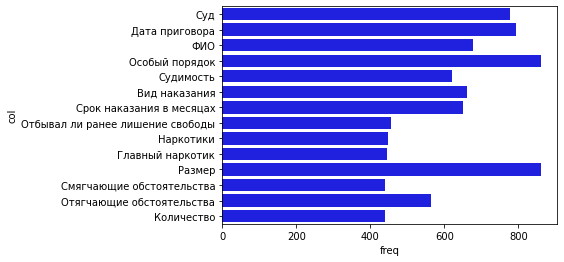

In [70]:
import seaborn as sns
from loguru import logger
logger.remove()
ax = sns.barplot(x=df_na["freq"], y=df_na["col"], color='b')

In [58]:
def extract_text_and_attrs_old(records):
    summaries = []
    for r in records:
        uid = r[0] 
        html_text = r[1]
        parsed_text = html_parser.extract_html(html_text)
        sd = EntityExtractor(parsed_text).summary_dict
        sd["text"] = parsed_text
        sd["doc_id"] = uid
        summaries.append(sd)
    return summaries